In [8]:
import tensorly as tl
import numpy as np
from tensorly import tenalg

from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (10,7)
import seaborn as sns

from tqdm import tqdm

from tensorly.decomposition import parafac

from unknownev.imputer import impute

In [9]:
# a = np.array([1,2,3,4])
# b = np.array([5,7,11])
# c = np.array([100,1700])

In [10]:
tensor = np.load('../ODdata/tensors/w2d1.npz')['data']
#tensor = tl.tensor(np.random.rand(4,5,6))
#tensor.shape

In [11]:
# def impute_lowlevel(tensor, rank, mode=1,  mask=np.ones(1), A=np.zeros(1), B=np.zeros(1), C=np.zeros(1)):
    
    
#     if mask.all():
#          mask = np.ones(tensor.shape)
#     else:
#          pass
        
#     # assert tensor.shape == mask.shape
        
#     if A.sum()==0 and B.sum()==0 and C.sum()==0:
#         maxim = tensor.max()
#         dim0,dim1,dim2 = tensor.shape
#         A=np.random.rand(dim0,rank)*maxim/2
#         B=np.random.rand(dim1,rank)*maxim/2
#         C=np.random.rand(dim2,rank)*maxim/2
    
#     assert 0 <= mode <= 2
    
#     if mode==1: pass
#     elif mode==0:
#         __ = tl.transpose(tensor)
#         __ = tl.moveaxis(__,1,2)
#         tensor = __
#         A,B,C = C,A,B
#         # (4, 3, 2) -> (2, 4, 3) 
        
#         # do same for mask
#         __m = tl.transpose(mask)
#         __m = tl.moveaxis(__m, 1,2)
#         mask = __m
        
#     elif mode==2:
#         # mode=2
#         __ = tl.transpose(tensor)
#         __ = tl.moveaxis(__,0,1)
#         tensor = __
#         A,B,C = B,C,A
#         # (4, 3, 2) -> (3, 2, 4)
        
#         # do same for mask
#         __m = tl.transpose(mask)
#         __m = tl.moveaxis(__m, 0,1)
#         mask = __m
        
    
    
#     # gen ACFLAT
#     AC = np.einsum('ij,jk->jik',A,C.T)
#     ACFLAT = np.zeros( (np.prod(AC.shape[1:]),AC.shape[0]) )
            
#     for i in range(AC.shape[0]):
#         ACFLAT[:,i] = AC[i].ravel("F")
        
    
    
#     # gen tensorflat
#     tensorflat = np.zeros( (np.prod([tensor.shape[0],tensor.shape[2]]), tensor.shape[1] ) )
#     maskflat = np.zeros( (np.prod([mask.shape[0],mask.shape[2]]), mask.shape[1] ) )
    
#     for i in range(tensor.shape[2]):
#         tensorflat[i*tensor.shape[0]:(i+1)*tensor.shape[0],:] = tensor[:,:,i]
#         maskflat[i*mask.shape[0]:(i+1)*mask.shape[0],:] = mask[:,:,i]
        

        
#     #print(ACFLAT.shape, B.T.shape, tensorflat.shape)
#     #print(B.shape)
#     if mask.all():
#         Btranspose,residuals,__rank_of_ACFLAT,singular_values = np.linalg.lstsq(ACFLAT, tensorflat, rcond=None)
#         B = Btranspose.T
#     else:
#         for i in range(tensorflat.shape[1]):
#             ACFLAT_masked = ACFLAT * np.outer(maskflat[:,i],np.ones(ACFLAT.shape[1]))
#             tensorflat_masked = tensorflat[:,i]*maskflat[:,i]
            
            
#             # generating the factors one component at a time
#             B[i,:],residuals,__rank_of_ACFLAT,singular_values = np.linalg.lstsq(ACFLAT_masked, tensorflat_masked , rcond=None)    
    
#     # Move axis back
#     if mode==0:
#         __ = tl.moveaxis(tensor,1,2)
#         __ = tl.transpose(__)
#         tensor = __
#         # A,B,C = C,A,B
#         A,B,C = B,C,A
        
#         # same for mask
#         __m = tl.moveaxis(mask,1,2)
#         __m = tl.transpose(__m)
#         mask = __m
        
#     elif mode==2:
#         __ = tl.moveaxis(tensor,1,0)
#         __ = tl.transpose(__)
#         tensor = __
#         # A,B,C = B,C,A
#         A,B,C = C,A,B
        
#         # same for mask
#         __m = tl.moveaxis(mask,1,0)
#         __m = tl.transpose(__m)
#         mask = __m
    
#     #print(residuals)
#     weights = np.repeat(1,rank)
#     reconstructed = tl.cp_to_tensor(       (weights,(A,B,C))         )
#     rec_err = tl.norm(tensor - reconstructed) / tl.norm(tensor)
    
#     inv_mask = 1 - mask
#     imp_err = tl.norm( ( tensor - reconstructed ) * inv_mask) / tl.norm( tensor * inv_mask)

#     return A,B,C,rec_err, imp_err

In [12]:
# def impute(tensor, rank=1, mask=np.ones(1), n_iters=100, tol=1e-7,verbose=True):
    
#     recon_errors = []
#     impute_errors = []
    
#     a,b,c,re,ie = impute_lowlevel(tensor,mode=0, rank=rank)
    
#     last_re = np.inf
    
#     tqdm_context = tqdm(range(n_iters), colour='#00FFD1', ncols=100)
    
#     break_count = 0
    
#     for xyz in tqdm_context:
#         a,b,c,re,ie = impute_lowlevel(tensor,A=a,B=b,C=c,mode=xyz%3, rank=rank, mask=mask)
#         recon_errors.append(re)
#         impute_errors.append(ie)
        
        
#         tqdm_context.set_postfix(re="{:.7f}".format(re), ie="{:.7f}".format(ie))
        
#         if last_re - re > tol:
#             pass
#         else:
#             break_count+=1
#             if break_count > 10: 
#                 break
            
#         last_re = re
        
#     return a,b,c, np.array(recon_errors) , np.array(impute_errors)

In [ ]:
mask = np.random.random(tensor.shape)
mask = (mask>0.2)*1
#mask = np.ones(tensor.shape)

print(mask.sum()/np.prod(mask.shape))

ranks = range(1,50,2)


rank_vs_rec = {}
rank_vs_imp = {}

for rnk in ranks:
    a,b,c,rec_errors, imp_errors = impute(tensor, rank=rnk, n_iters=1000, mask=mask)
    rank_vs_rec[f"{rnk}"]=rec_errors
    rank_vs_imp[f"{rnk}"]=imp_errors

0.8002096354166667


/media/ANRGSSD512/sampad/RAWDATA/unknown-ev/unknownev/imputer.py:124: RuntimeWarning: invalid value encountered in double_scalars
  imp_err = tl.norm( ( tensor - reconstructed ) * inv_mask) / tl.norm( tensor * inv_mask)
  6%|█▉                               | 59/1000 [01:20<20:27,  1.30s/it, ie=0.7644192, re=0.7241956]

Text(0, 0.5, 'errors')

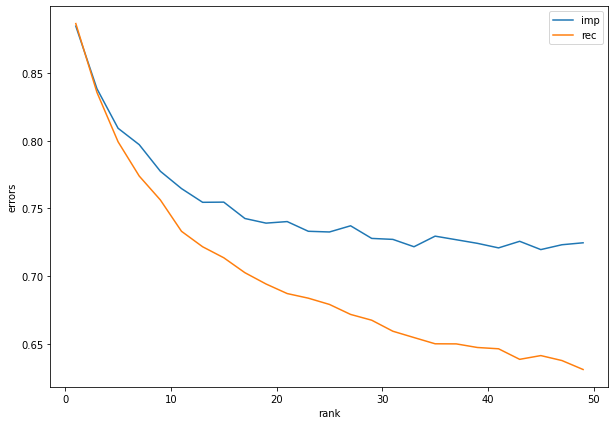

In [105]:
RANK_IMP = []
RANK_REC = []
for x,y in rank_vs_imp.items():
    RANK_IMP.append(min(y))
    
for x,y in rank_vs_rec.items():
    RANK_REC.append(min(y))
    
sns.lineplot(x=ranks, y=RANK_IMP, label="imp")
sns.lineplot(x=ranks, y=RANK_REC, label="rec")

plt.xlabel("rank")
plt.ylabel("errors")

Text(0.5, 0, 'iterations')

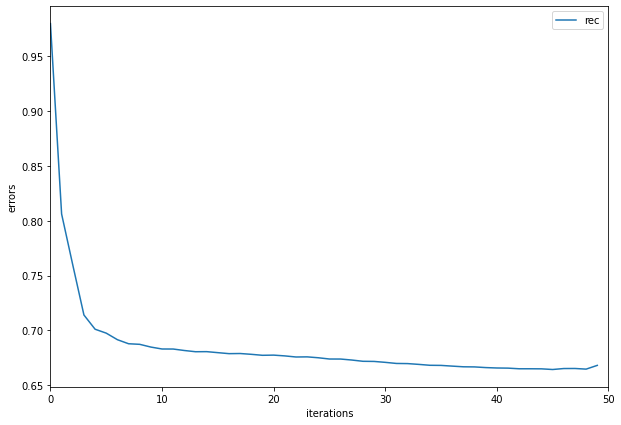

In [9]:
sns.lineplot(data=rec_errors,label="rec")
#sns.lineplot(data=imp_errors, label="imp")
plt.xlim(0,50)
plt.ylabel('errors')
plt.xlabel('iterations')

In [ ]:
A = np.array([[1,2,3],[4,5,6]])
C = np.array([[10,70],[111,999]])
print(A,C)
# gen ACFLAT
AC = np.einsum('ij,jk->jik',A,C.T)
ACFLAT = np.zeros( (np.prod(AC.shape[1:]),AC.shape[0]) )

In [ ]:
K=15
M,N,P = 10,20,30
t = tl.cp_to_tensor( ( np.array([1]*K) , [100*np.random.rand(M,K), 100*np.random.rand(N,K), 100*np.random.rand(P,K)] ))

myerr = []
myerr__mask = []
tlerr = []

__mask = (np.random.rand(M,N,P) > 0.2)*1
print(__mask.sum() / (M*N*P))

for RANK in range(5,20):
    a,b,c,re,ie = impute(t, n_iters=2000, rank=RANK)
    a,b,c,mre,mie = impute(t, n_iters=2000, rank=RANK, mask=__mask)
    
    (w,f),e = parafac(t, rank=RANK, return_errors=True)
    
    myerr.append(re[-1])
    tlerr.append(e[-1])
    myerr__mask.append(mre[-1])
    

/home/sampad/pyv/lib/python3.6/site-packages/ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars


0.7995


  2%|▌                               | 38/2000 [00:00<00:11, 177.34it/s, ie=0.0530974, re=0.0464048]

Text(0.5, 1.0, 'Upto rank 10 cp-decomp/impute of a 10x20x30 tensor of original rank 15')

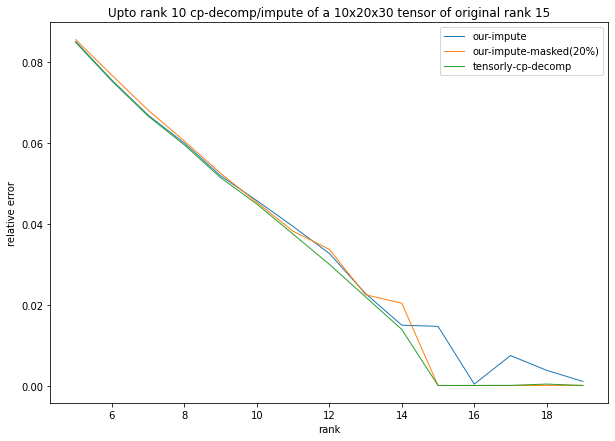

In [110]:
sns.lineplot(x=range(5,20),y=tlerr, label='our-impute', linewidth=1)
sns.lineplot(x=range(5,20),y=myerr__mask, label='our-impute-masked(20%)',linewidth=1)
sns.lineplot(x=range(5,20),y=myerr, label='tensorly-cp-decomp',linewidth=1)
plt.xlabel('rank')
plt.ylabel('relative error')
plt.title("Upto rank 10 cp-decomp/impute of a 10x20x30 tensor of original rank 15")

In [57]:
e[-1]

0.1729108454604816